Постройте гистограмму изображения в палитре RGB. Сравните оценку плотностей распределения интенсивностей по каналам R, G и B

In [1]:
!pip install opencv-python==4.4.0.42

     |████████████████████████████████| 49.4MB 79kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30


In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils
%matplotlib inline

## **Коррекция контрастности при помощи гистограммы**

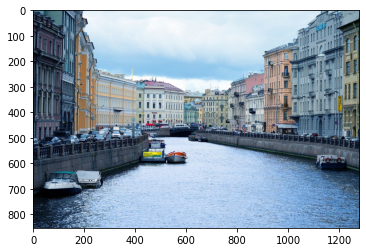

In [11]:
url1 = 'https://cdn.openedu.ru/ESZCBLZ/courseware/v1/76f03296d17782fb72782b6d4b4a5cc7/asset-v1:ITMOUniversity+IMAGPROC+spring_2021_ITMO_mag+type@asset+block/saint-petersburg-2547440_1280.jpg'
img = imutils.url_to_image(url1)
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img);

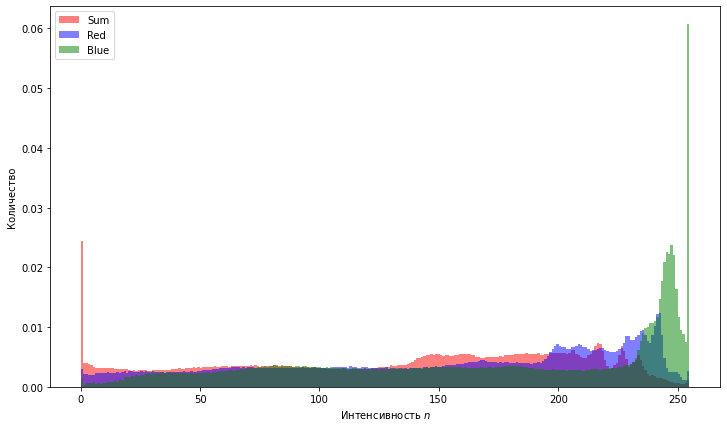

In [12]:
plt.figure(figsize = (12,7))
hist_red = plt.hist(RGB_img[:,:,0].ravel(), bins = 256, color = "Red", alpha = 0.5, density=True)
hist_blue = plt.hist(RGB_img[:,:,1].ravel(), bins = 256, color = "Blue", alpha = 0.5, density=True)
hist_green = plt.hist(RGB_img[:,:,2].ravel(), bins = 256, color = "Green", alpha = 0.5, density=True)
plt.legend(["Sum","Red", "Blue", "Green"])
plt.xlabel('Интенсивность $n$')
plt.ylabel('Количество')
plt.show()

Видно, что в изображении присутствуют далеко не все значения интенсивности. Исправим это, ипользуя, например, линейную нормировку. Для этого сначала сместим гистограмму так, чтобы она начиналась в нуле, а затем растянем на весь диапазон $0 - 255$.

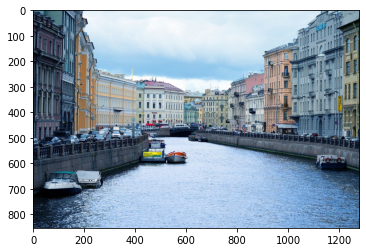

[187 183 171]


In [14]:
img_norm = RGB_img
hist_red = RGB_img[:,:,0]
hist_blue = RGB_img[:,:,1]
hist_green = RGB_img[:,:,2]
img_norm[:,:,0] = (hist_red - np.min(hist_red)) / (np.max(hist_red) - np.min(hist_red)) * 255
img_norm[:,:,1] = (hist_blue - np.min(hist_blue)) / (np.max(hist_blue) - np.min(hist_blue)) * 255
img_norm[:,:,2] = (hist_green - np.min(hist_green)) / (np.max(hist_green) - np.min(hist_green)) * 255
plt.imshow(img_norm)
plt.show()
print(img_norm[427, 648])